In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Clasificación de preguntas de clientes

In [ ]:
id='1EiSP1J6noYrKpdQoxQrgacoH45QSs1FG'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train.csv')

In [ ]:
train = pd.read_csv('train.csv', sep='|')
train.head()

,Pregunta,Intencion
0,como puedo trabajar en santander rio,Cat_102
1,pagar tarjeta visa querer reintegro,Cat_350
2,pagar tarjeta naranja sistema,Cat_132
3,no se debitó la primera cuota del plan de bien...,Cat_129
4,abonar tarjeta credito,Cat_342


In [ ]:
id='1nATD95-gjVDaHW5OZY2OLWVootBYoSdz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_santander.csv')

In [ ]:
test_santander = pd.read_csv('test_santander.csv')
test_santander.head()

,id,Pregunta
0,0,querer saber tarjeta sin limite
1,1,¿cuál es el límite de mi tarjeta santander?
2,2,hay beneficios en restaurantes de la costa atl...
3,3,semana realizar pagar afip monotributo volver ...
4,4,por un prestamo de mil. cuanto es el interes?


In [ ]:
train.loc[train['Intencion'].isna()]

,Pregunta,Intencion


In [ ]:
preguntas_por_cat = train['Intencion'].value_counts().to_frame()
preguntas_por_cat = preguntas_por_cat.rename(columns = {'Intencion':'Cantidad'})
preguntas_por_cat

,Cantidad
Cat_132,600
Cat_293,567
Cat_1,493
Cat_147,488
Cat_223,477
...,...
Cat_15,3
Cat_13,3
Cat_205,3
Cat_24,2


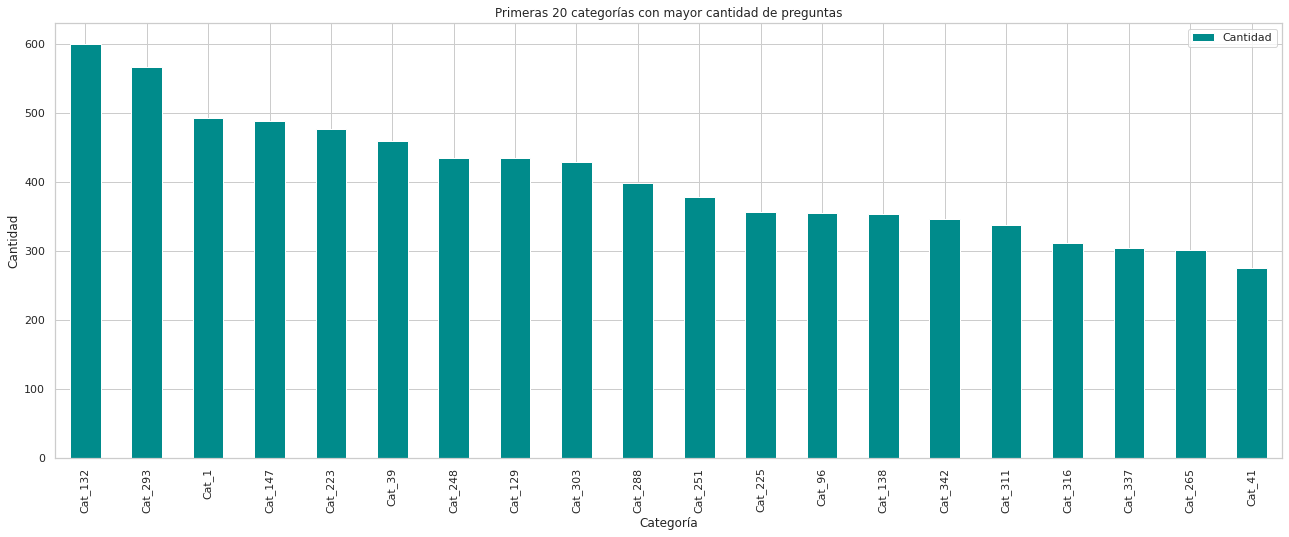

In [ ]:
preguntas_por_cat.head(20).plot(kind = 'bar', figsize = (22,8), title = 'Primeras 20 categorías con mayor cantidad de preguntas', color = 'darkcyan');
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Categoría');


In [ ]:
def tokenizar_y_remover_stop(x):
  stop_words = set(nltk.corpus.stopwords.words('spanish')) 
  word_tokens = nltk.word_tokenize(x)
  resultado = []
 
  for i in word_tokens:
    if (i.lower() not in stop_words) and (i.lower().isalnum()):
        resultado.append(i) 
  return (resultado)


test_santander['tokens'] = test_santander['Pregunta'].apply(lambda x : tokenizar_y_remover_stop(x))

test_santander['strtokens'] = test_santander.tokens.apply(lambda x: ' '.join(x))

text = " ".join(title for title in test_santander.strtokens)

train['tokens'] = train['Pregunta'].apply(lambda x : tokenizar_y_remover_stop(x))

train['strtokens'] = train.tokens.apply(lambda x: ' '.join(x))

text2 = " ".join(title for title in train.strtokens)


NameError: ignored

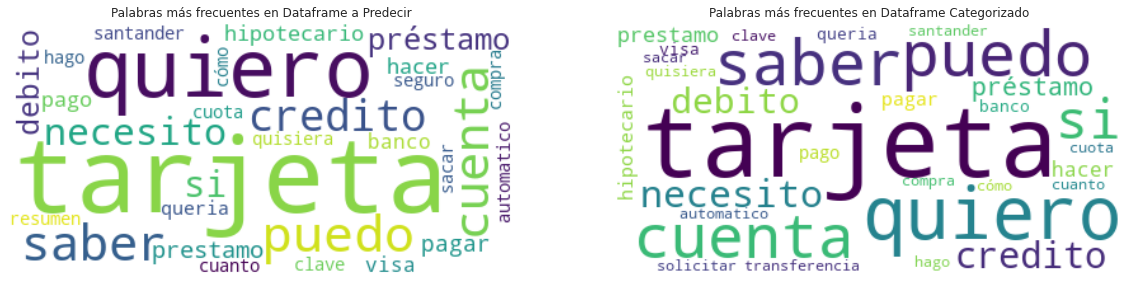

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words = 30).generate(text)

word_cloud2 = WordCloud(collocations = False, background_color = 'white', max_words = 30).generate(text2)

fig, axes = plt.subplots(figsize=(20, 20), nrows=1, ncols=2)
axes[0].imshow(word_cloud, interpolation='bilinear')
axes[1].imshow(word_cloud2, interpolation='bilinear')
axes[0].axis("off")
axes[1].axis("off")
axes[0].title.set_text('Palabras más frecuentes en Dataframe a Predecir')
axes[1].title.set_text('Palabras más frecuentes en Dataframe Categorizado')

#Predicción de éxitos en oportunidades comerciales

In [ ]:
id='1dOMHOcmTuEUmN6-OwaXzxmwtrSglE4fC'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('entrenamiento.csv')

In [ ]:
entrenamiento = pd.read_csv('entrenamiento.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.59,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.60,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [ ]:
prueba = entrenamiento[['ID', 'Opportunity_ID', 'Region', 'Stage', 'Opportunity_Name']]
prueba

,ID,Opportunity_ID,Region,Stage,Opportunity_Name
0,27761,0,EMEA,Closed Lost,Opportunity_Name_12598
1,27760,1,EMEA,Closed Won,Opportunity_Name_12600
2,27446,2,Americas,Closed Won,Opportunity_Name_469
3,16808,3,Americas,Closed Lost,Opportunity_Name_415
4,16805,4,Americas,Closed Lost,Opportunity_Name_851
...,...,...,...,...,...
16942,8781,12801,EMEA,Closed Won,Opportunity_Name_9245
16943,8786,12801,EMEA,Closed Won,Opportunity_Name_9245
16944,8792,12801,EMEA,Closed Won,Opportunity_Name_9245
16945,28561,12802,Americas,Closed Lost,Opportunity_Name_5843


In [ ]:
prueba = prueba.loc[(prueba['Stage']=='Closed Lost')|(prueba['Stage']=='Closed Won')]
prueba

,ID,Opportunity_ID,Region,Stage,Opportunity_Name
0,27761,0,EMEA,Closed Lost,Opportunity_Name_12598
1,27760,1,EMEA,Closed Won,Opportunity_Name_12600
2,27446,2,Americas,Closed Won,Opportunity_Name_469
3,16808,3,Americas,Closed Lost,Opportunity_Name_415
4,16805,4,Americas,Closed Lost,Opportunity_Name_851
...,...,...,...,...,...
16942,8781,12801,EMEA,Closed Won,Opportunity_Name_9245
16943,8786,12801,EMEA,Closed Won,Opportunity_Name_9245
16944,8792,12801,EMEA,Closed Won,Opportunity_Name_9245
16945,28561,12802,Americas,Closed Lost,Opportunity_Name_5843


In [ ]:
grouped = prueba.groupby('Opportunity_ID').agg({"Region": 'first', 'Stage': 'first', "ID": 'count'}).reset_index()
grouped

,Opportunity_ID,Region,Stage,ID
0,0,EMEA,Closed Lost,1
1,1,EMEA,Closed Won,1
2,2,Americas,Closed Won,1
3,3,Americas,Closed Lost,1
4,4,Americas,Closed Lost,1
...,...,...,...,...
9786,12799,EMEA,Closed Won,1
9787,12800,Americas,Closed Lost,2
9788,12801,EMEA,Closed Won,3
9789,12802,Americas,Closed Lost,1


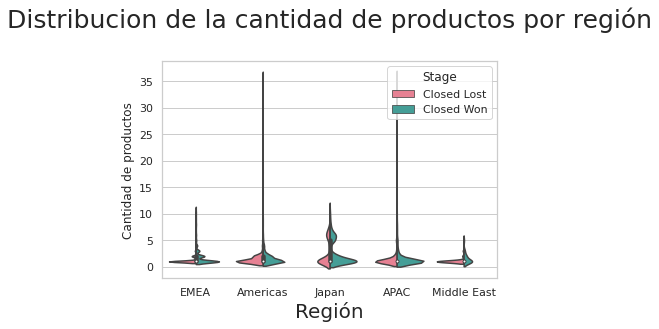

In [ ]:
ax = sns.violinplot(x= "Region", y="ID", hue="Stage", data=grouped, palette="husl", split=True, scale="count")
plt.title("Distribucion de la cantidad de productos por región\n",size=25)
plt.rcParams["figure.figsize"] = (20,20)
plt.xlabel("Región", fontsize=20)
plt.ylabel("Cantidad de productos")
plt.show()

In [ ]:
np.percentile(grouped['ID'], 99)

8.0

In [ ]:
grouped = grouped.loc[grouped['ID']<= 8]
grouped

,Opportunity_ID,Region,Stage,ID
0,0,EMEA,Closed Lost,1
1,1,EMEA,Closed Won,1
2,2,Americas,Closed Won,1
3,3,Americas,Closed Lost,1
4,4,Americas,Closed Lost,1
...,...,...,...,...
9786,12799,EMEA,Closed Won,1
9787,12800,Americas,Closed Lost,2
9788,12801,EMEA,Closed Won,3
9789,12802,Americas,Closed Lost,1


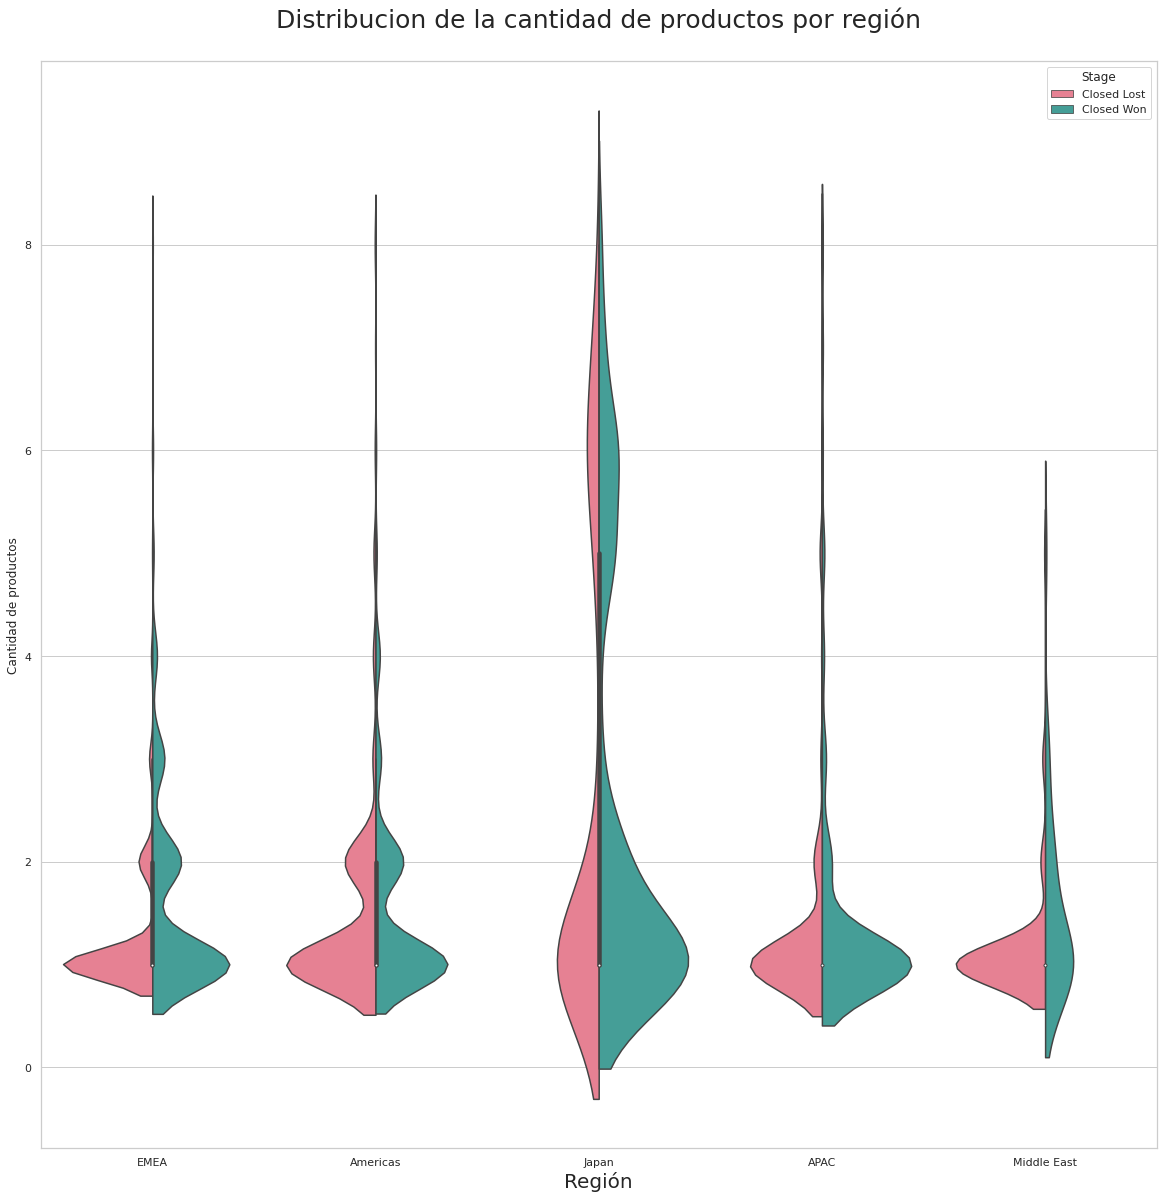

In [ ]:
ax = sns.violinplot(x= "Region", y="ID", hue="Stage", data=grouped, palette="husl", split=True, scale="count")
plt.title("Distribucion de la cantidad de productos por región\n",size=25)
plt.rcParams["figure.figsize"] = (20,15)
plt.xlabel("Región", fontsize=20)
plt.ylabel("Cantidad de productos")
plt.show()

In [ ]:
entrenamiento['Account_Created_Date'] = pd.to_datetime(entrenamiento['Account_Created_Date'])


In [ ]:
entrenamiento['Mes']=entrenamiento['Account_Created_Date'].dt.month
entrenamiento['Año']=entrenamiento['Account_Created_Date'].dt.year
entrenamiento

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Mes,Año
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.59,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None,6,2015
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.60,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None,6,2015
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None,4,2015
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None,7,2013
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None,7,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.52,USD,0.59,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,1,2016
16943,8786,EMEA,Austria,1,1,1,1,0,Bur

In [ ]:
casos_exitosos=entrenamiento[entrenamiento['Stage']=='Closed Won'][['Año', 'Mes','Account_Name','Opportunity_ID','Product_Name','Total_Amount']]
casos_exitosos

,Año,Mes,Account_Name,Opportunity_ID,Product_Name,Total_Amount
1,2015,6,Account_Name_619,1,Product_Name_100,"48,230.00"
2,2015,4,Account_Name_1794,2,Product_Name_91,"83,865.60"
7,2015,4,Account_Name_1794,7,Product_Name_251,"50,688.00"
23,2015,10,Account_Name_1147,11,Product_Name_84,"1,621,851.00"
63,2013,7,Account_Name_263,20,Product_Name_100,"103,350.00"
...,...,...,...,...,...,...
16937,2013,7,Account_Name_533,12797,Product_Name_96,"413,400.00"
16939,2013,7,Account_Name_533,12799,Product_Name_96,"401,700.00"
16942,2016,1,Account_Name_726,12801,Product_Name_111,"103,350.00"
16943,2016,1,Account_Name_726,12801,Product_Name_111,"93,015.00"


In [ ]:
prueba = casos_exitosos.groupby('Account_Name').agg({'Año':'first', 'Mes':'first'}).reset_index()
prueba

,Account_Name,Año,Mes
0,Account_Name_0,2016,7
1,Account_Name_100,2018,7
2,Account_Name_1001,2014,1
3,Account_Name_1002,2016,9
4,Account_Name_1006,2014,9
...,...,...,...
662,Account_Name_991,2014,2
663,Account_Name_993,2014,5
664,Account_Name_994,2016,3
665,Account_Name_998,2018,11


In [ ]:
tabla = prueba.pivot_table(index='Año',columns='Mes',values='Account_Name',aggfunc='count').fillna(0).reset_index()
tabla

Mes,Año,1,2,3,4,5,6,7,8,9,10,11,12
0,2013,0.00,0.00,0.00,0.00,0.00,0.00,42.00,9.00,5.00,8.00,2.00,1.00
1,2014,9.00,7.00,2.00,2.00,4.00,4.00,2.00,5.00,8.00,4.00,4.00,3.00
2,2015,3.00,5.00,4.00,9.00,2.00,10.00,4.00,2.00,4.00,6.00,3.00,6.00
3,2016,11.00,12.00,10.00,10.00,16.00,25.00,15.00,15.00,19.00,15.00,17.00,17.00
4,2017,14.00,9.00,18.00,8.00,27.00,22.00,13.00,14.00,13.00,17.00,8.00,16.00
5,2018,8.00,12.00,8.00,11.00,12.00,11.00,16.00,17.00,9.00,8.00,10.00,5.00


In [ ]:
tabla = tabla.loc[1:].set_index('Año')
tabla

Mes,1,2,3,4,5,6,7,8,9,10,11,12
Año,,,,,,,,,,,,
2014,9.00,7.00,2.00,2.00,4.00,4.00,2.00,5.00,8.00,4.00,4.00,3.00
2015,3.00,5.00,4.00,9.00,2.00,10.00,4.00,2.00,4.00,6.00,3.00,6.00
2016,11.00,12.00,10.00,10.00,16.00,25.00,15.00,15.00,19.00,15.00,17.00,17.00
2017,14.00,9.00,18.00,8.00,27.00,22.00,13.00,14.00,13.00,17.00,8.00,16.00
2018,8.00,12.00,8.00,11.00,12.00,11.00,16.00,17.00,9.00,8.00,10.00,5.00


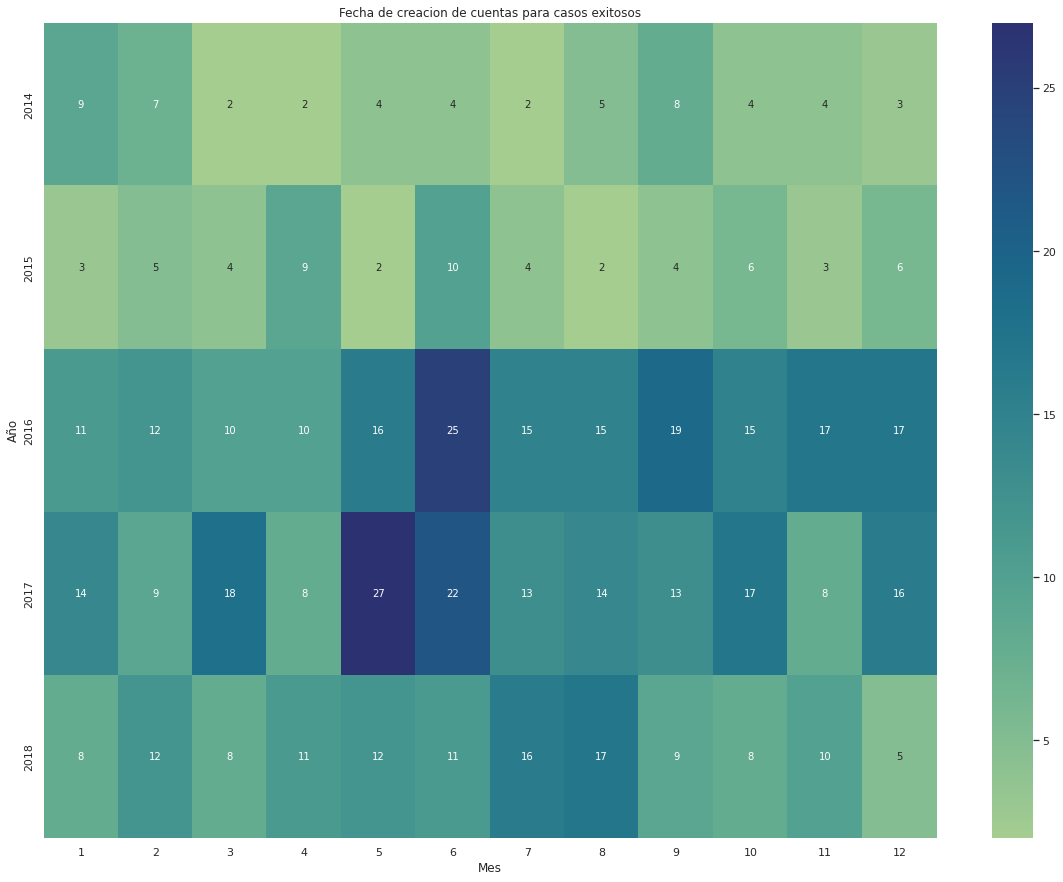

In [ ]:
fig,ax=plt.subplots()
 
mapa=sns.heatmap(tabla ,cmap='crest',annot=True)
mapa.set_title('Fecha de creacion de cuentas para casos exitosos')
mapa



In [ ]:
casos_no_exitosos=entrenamiento[entrenamiento.Stage=='Closed Lost'][['Año', 'Mes','Account_Name','Opportunity_ID','Product_Name','Total_Amount']]
casos_no_exitosos

,Año,Mes,Account_Name,Opportunity_ID,Product_Name,Total_Amount
0,2015,6,Account_Name_619,0,Product_Name_99,"5,272,800.00"
3,2013,7,Account_Name_1201,3,Product_Name_432,"7,421,881.50"
4,2013,7,Account_Name_1201,4,Product_Name_432,"13,357,192.50"
5,2013,7,Account_Name_1201,5,Product_Name_432,"14,838,277.50"
6,2013,7,Account_Name_1201,6,Product_Name_308,"2,659,494.60"
...,...,...,...,...,...,...
16938,2015,12,Account_Name_586,12798,Product_Name_110,"1,307,775.00"
16940,2014,6,Account_Name_404,12800,Product_Name_307,"10,751,580.00"
16941,2014,6,Account_Name_404,12800,Product_Name_286,"10,580,920.00"
16945,2015,10,Account_Name_944,12802,Product_Name_287,"2,346,796.88"


In [ ]:
prueba2 = casos_no_exitosos.groupby('Account_Name').agg({'Año':'first', 'Mes':'first'}).reset_index()
prueba2

,Account_Name,Año,Mes
0,Account_Name_1,2016,5
1,Account_Name_10,2016,7
2,Account_Name_1000,2016,1
3,Account_Name_1004,2016,8
4,Account_Name_1006,2014,9
...,...,...,...
1394,Account_Name_990,2017,5
1395,Account_Name_991,2014,2
1396,Account_Name_994,2016,3
1397,Account_Name_996,2017,10


In [ ]:
tabla2 = prueba2.pivot_table(index='Año',columns='Mes',values='Account_Name',aggfunc='count').fillna(0).reset_index()
tabla2

Mes,Año,1,2,3,4,5,6,7,8,9,10,11,12
0,2013,0.00,0.00,0.00,0.00,0.00,0.00,69.00,22.00,9.00,14.00,8.00,5.00
1,2014,10.00,10.00,6.00,3.00,7.00,6.00,6.00,7.00,16.00,4.00,8.00,6.00
2,2015,4.00,9.00,11.00,15.00,15.00,23.00,15.00,11.00,20.00,14.00,16.00,15.00
3,2016,23.00,24.00,27.00,21.00,43.00,42.00,26.00,22.00,41.00,38.00,40.00,39.00
4,2017,27.00,38.00,46.00,33.00,52.00,60.00,29.00,25.00,33.00,18.00,16.00,30.00
5,2018,23.00,29.00,23.00,21.00,17.00,21.00,35.00,18.00,12.00,16.00,7.00,0.00


In [ ]:
tabla2 = tabla2.loc[1:].set_index('Año')
tabla2

Mes,1,2,3,4,5,6,7,8,9,10,11,12
Año,,,,,,,,,,,,
2014,10.00,10.00,6.00,3.00,7.00,6.00,6.00,7.00,16.00,4.00,8.00,6.00
2015,4.00,9.00,11.00,15.00,15.00,23.00,15.00,11.00,20.00,14.00,16.00,15.00
2016,23.00,24.00,27.00,21.00,43.00,42.00,26.00,22.00,41.00,38.00,40.00,39.00
2017,27.00,38.00,46.00,33.00,52.00,60.00,29.00,25.00,33.00,18.00,16.00,30.00
2018,23.00,29.00,23.00,21.00,17.00,21.00,35.00,18.00,12.00,16.00,7.00,0.00


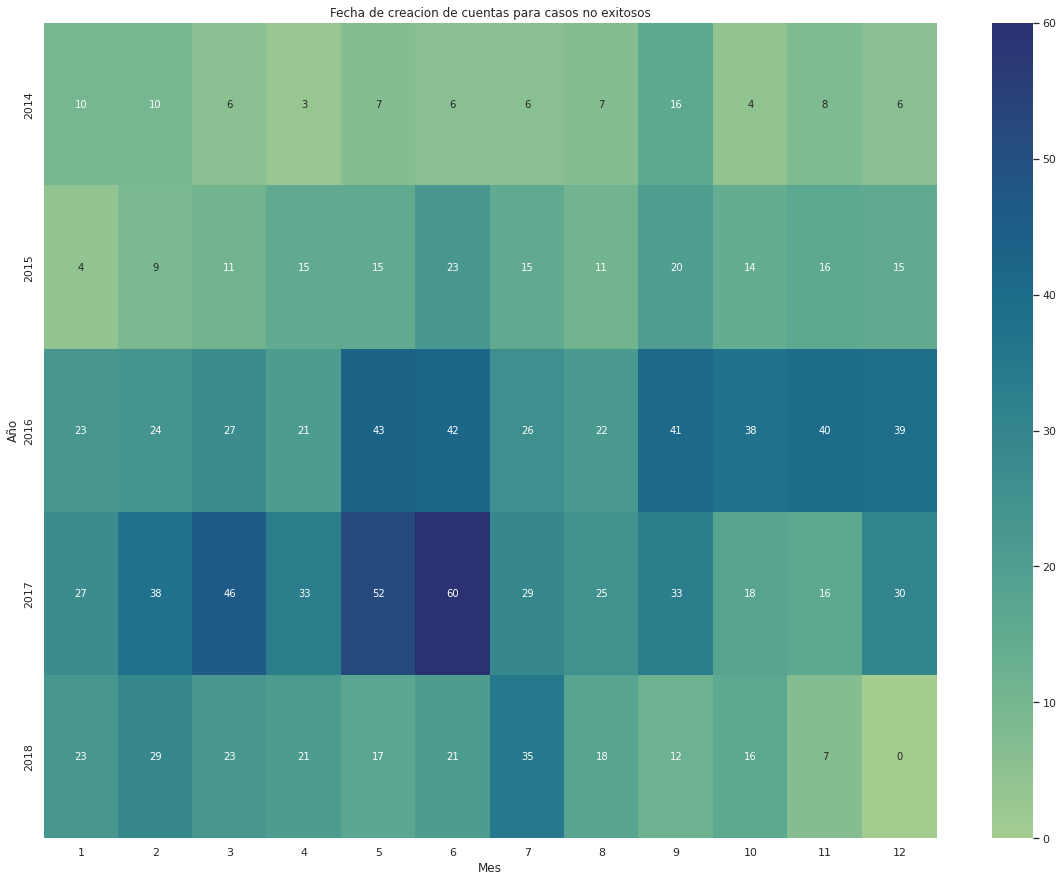

In [ ]:
fig,ax=plt.subplots()
 
mapa2=sns.heatmap(tabla2,cmap='crest',annot=True)
mapa2.set_title('Fecha de creacion de cuentas para casos no exitosos')
mapa2



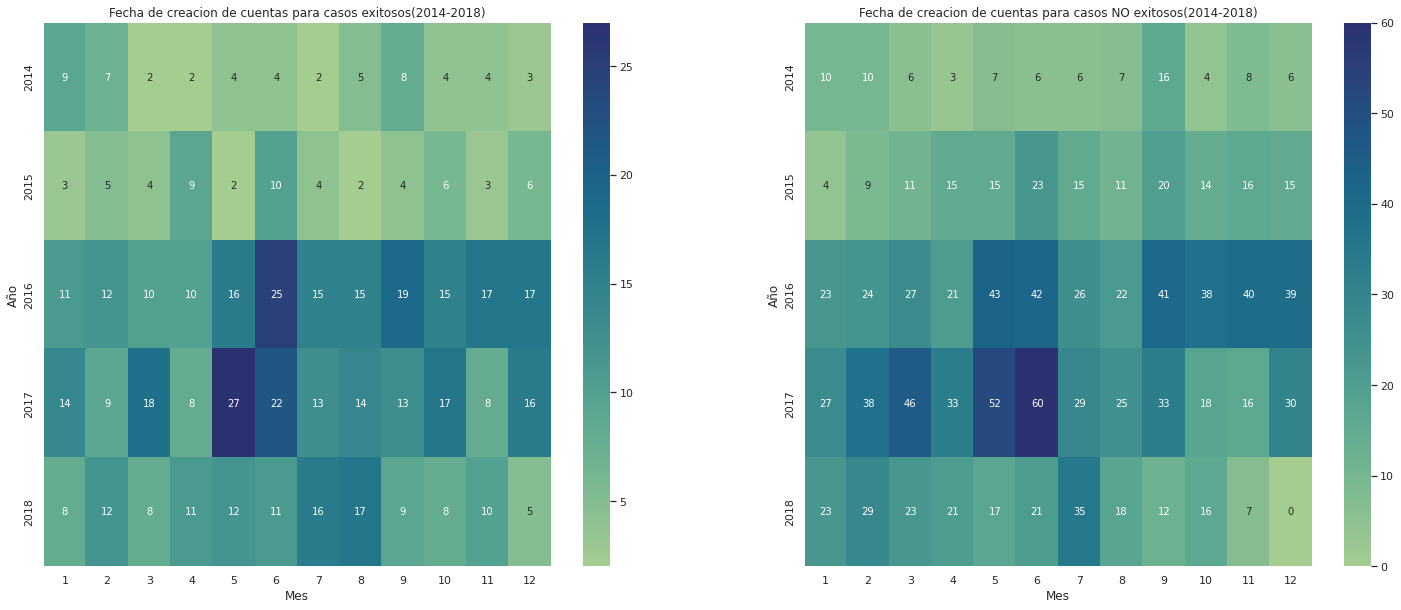

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))

sns.heatmap(tabla, ax=ax1,cmap='crest',annot=True)
sns.heatmap(tabla2, ax=ax2,cmap='crest',annot=True)
ax1.title.set_text('Fecha de creacion de cuentas para casos exitosos(2014-2018)')
ax2.title.set_text('Fecha de creacion de cuentas para casos NO exitosos(2014-2018)')
plt.show()

#MercadoLibre

In [ ]:
id='1Hehrb5hH_NTAMZsdAMqaxk__Jmeplexl'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_data.csv')

In [ ]:
test_data = pd.read_csv('test_data.csv')
test_data

,sku,target_stock
0,464801,3
1,645793,4
2,99516,8
3,538100,8
4,557191,10
...,...,...
551467,129187,8
551468,6707,30
551469,170355,3
551470,246568,2


In [ ]:
test_data.target_stock.quantile(.95)

58.0

In [ ]:
id='1X_TyMv-AdHm0EFlWKJ-S8o7fKaeZs91n'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_data.parquet')

In [ ]:
train_data = pd.read_parquet('train_data.parquet')
train_data

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,"22,057.00",ARG,classic,drop_off,free_shipping,267.71
37660275,6707,2021-03-31,0,"26,999.00",ARG,classic,cross_docking,free_shipping,266.08
37660276,170355,2021-03-31,0,"3,400.00",ARG,classic,drop_off,paid_shipping,0.25
37660277,246568,2021-03-31,0,"6,289.00",ARG,classic,fulfillment,free_shipping,135.42


In [ ]:
train_data.dtypes

sku                         int64
date                       object
sold_quantity               int64
current_price             float64
currency                   object
listing_type               object
shipping_logistic_type     object
shipping_payment           object
minutes_active            float64
dtype: object

In [ ]:
prueba3 = train_data.copy()
prueba3

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,"22,057.00",ARG,classic,drop_off,free_shipping,267.71
37660275,6707,2021-03-31,0,"26,999.00",ARG,classic,cross_docking,free_shipping,266.08
37660276,170355,2021-03-31,0,"3,400.00",ARG,classic,drop_off,paid_shipping,0.25
37660277,246568,2021-03-31,0,"6,289.00",ARG,classic,fulfillment,free_shipping,135.42


In [ ]:
prueba3.minutes_active.describe()

count          37,660,279.00
mean                1,043.41
std                   630.25
min                     0.00
25%                     0.00
50%                 1,440.00
75%                 1,440.00
max                 1,440.00
Name: minutes_active, dtype: float64

In [ ]:
prueba3.dtypes

sku                         int64
date                       object
sold_quantity               int64
current_price             float64
currency                   object
listing_type               object
shipping_logistic_type     object
shipping_payment           object
minutes_active            float64
dtype: object

In [ ]:
prueba3.date = pd.to_datetime(prueba3.date)

In [ ]:
prueba3['dia'] = prueba3['date'].dt.day
prueba3

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,dia
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",1
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",2
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",3
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",4
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",5
...,...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,"22,057.00",ARG,classic,drop_off,free_shipping,267.71,31
37660275,6707,2021-03-31,0,"26,999.00",ARG,classic,cross_docking,free_shipping,266.08,31
37660276,170355,2021-03-31,0,"3,400.00",ARG,classic,drop_off,paid_shipping,0.25,31
37660277,246568,2021-03-31,0,"6,289.00",ARG,classic,fulfillment,free_shipping,135.42,31


In [ ]:
prueba4 = prueba3.loc[(prueba3['sold_quantity'] > 10)]
prueba4

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,dia
840,105633,2021-02-15,11,20.45,REA,premium,fulfillment,paid_shipping,"1,440.00",15
843,105633,2021-02-18,13,20.45,REA,premium,fulfillment,paid_shipping,"1,440.00",18
862,105633,2021-03-09,15,20.45,REA,premium,fulfillment,paid_shipping,"1,440.00",9
884,105633,2021-03-31,12,20.45,REA,premium,fulfillment,paid_shipping,"1,440.00",31
2638,72944,2021-03-23,12,21.00,REA,premium,fulfillment,paid_shipping,"1,440.00",23
...,...,...,...,...,...,...,...,...,...,...
37659506,368361,2021-03-31,14,"73,999.00",ARG,premium,fulfillment,free_shipping,"1,440.00",31
37659507,69553,2021-03-29,26,"26,999.00",ARG,classic,fulfillment,free_shipping,965.78,29
37659581,286660,2021-03-31,15,"5,175.00",ARG,classic,fulfillment,free_shipping,"1,440.00",31
37659588,333045,2021-03-29,17,"5,129.00",ARG,classic,fulfillment,free_shipping,817.33,29


Text(0, 0.5, 'Frecuencia')

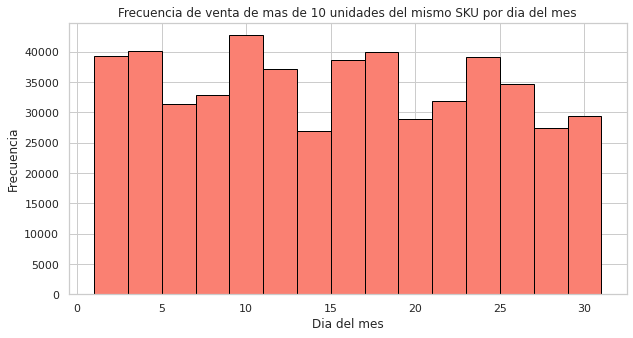

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (10, 5))

#plot
ax.hist(prueba4['dia'], bins=15, edgecolor="black", color = 'salmon');
plt.title("Frecuencia de venta de mas de 10 unidades del mismo SKU por dia del mes")
plt.xlabel("Dia del mes")
plt.ylabel("Frecuencia")

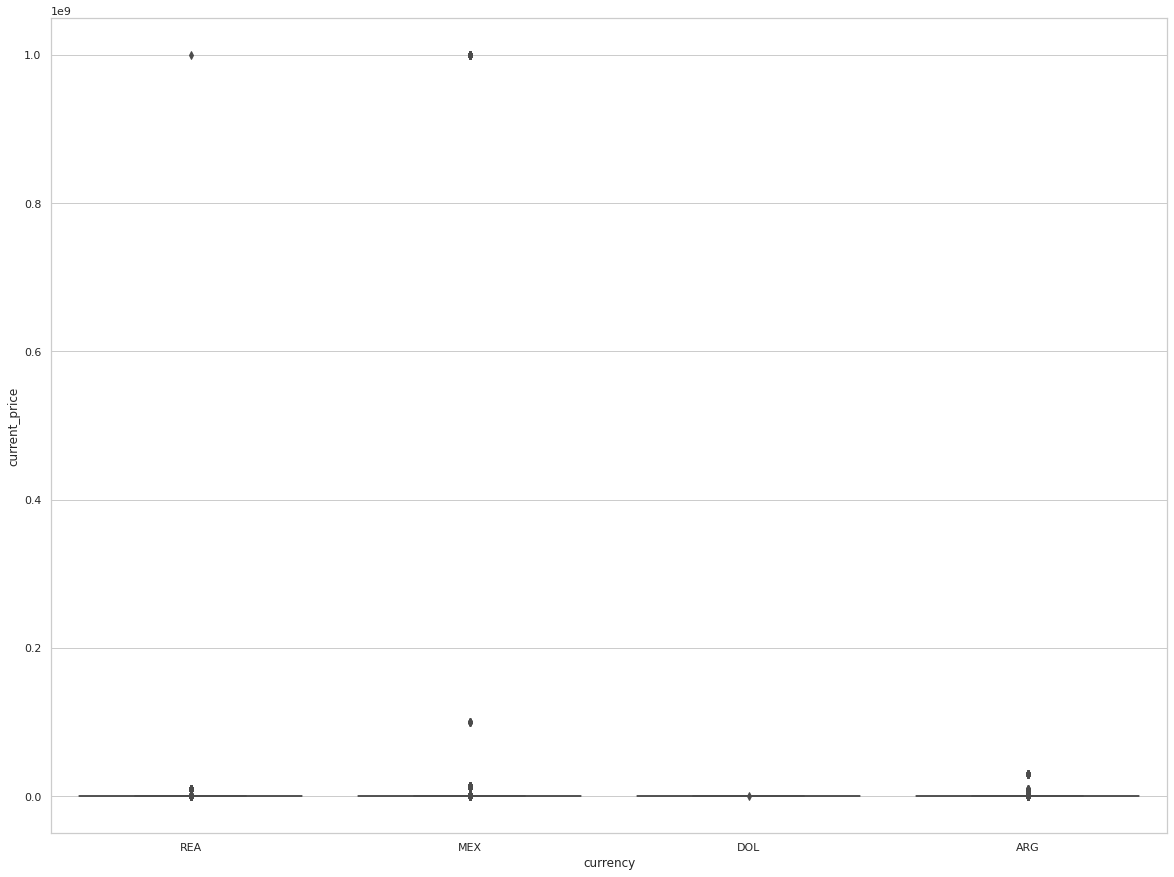

In [ ]:
sns.boxplot( x="currency", y="current_price", data= prueba3)
plt.rcParams["figure.figsize"] = (40,30)


In [ ]:
merge = prueba3.merge(test_data, how='inner', on='sku')
merge

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,dia,target_stock
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",1,3
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",2,3
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",3,3
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",4,3
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,"1,440.00",5,3
...,...,...,...,...,...,...,...,...,...,...,...
31284422,129187,2021-03-31,0,"22,057.00",ARG,classic,drop_off,free_shipping,267.71,31,8
31284423,6707,2021-03-31,0,"26,999.00",ARG,classic,cross_docking,free_shipping,266.08,31,30
31284424,170355,2021-03-31,0,"3,400.00",ARG,classic,drop_off,paid_shipping,0.25,31,3
31284425,246568,2021-03-31,0,"6,289.00",ARG,classic,fulfillment,free_shipping,135.42,31,2


In [ ]:
merge_arg = merge.loc[merge.currency == 'ARG']
merge_arg

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,dia,target_stock
28553446,335582,2021-02-01,6,620.00,ARG,classic,fulfillment,paid_shipping,"1,440.00",1,11
28553447,335582,2021-02-02,0,620.00,ARG,classic,fulfillment,paid_shipping,"1,440.00",2,11
28553448,335582,2021-02-03,4,620.00,ARG,classic,fulfillment,paid_shipping,"1,440.00",3,11
28553449,335582,2021-02-04,0,620.00,ARG,classic,fulfillment,paid_shipping,"1,440.00",4,11
28553450,335582,2021-02-05,6,620.00,ARG,classic,fulfillment,paid_shipping,"1,440.00",5,11
...,...,...,...,...,...,...,...,...,...,...,...
31284422,129187,2021-03-31,0,"22,057.00",ARG,classic,drop_off,free_shipping,267.71,31,8
31284423,6707,2021-03-31,0,"26,999.00",ARG,classic,cross_docking,free_shipping,266.08,31,30
31284424,170355,2021-03-31,0,"3,400.00",ARG,classic,drop_off,paid_shipping,0.25,31,3
31284425,246568,2021-03-31,0,"6,289.00",ARG,classic,fulfillment,free_shipping,135.42,31,2


In [ ]:
merge_arg.current_price.quantile(.95)

12985.0

In [ ]:
merge_arg = merge_arg.loc[merge_arg.current_price <12985]

Text(0.5, 1.0, 'Precios de los productos en Argentina')

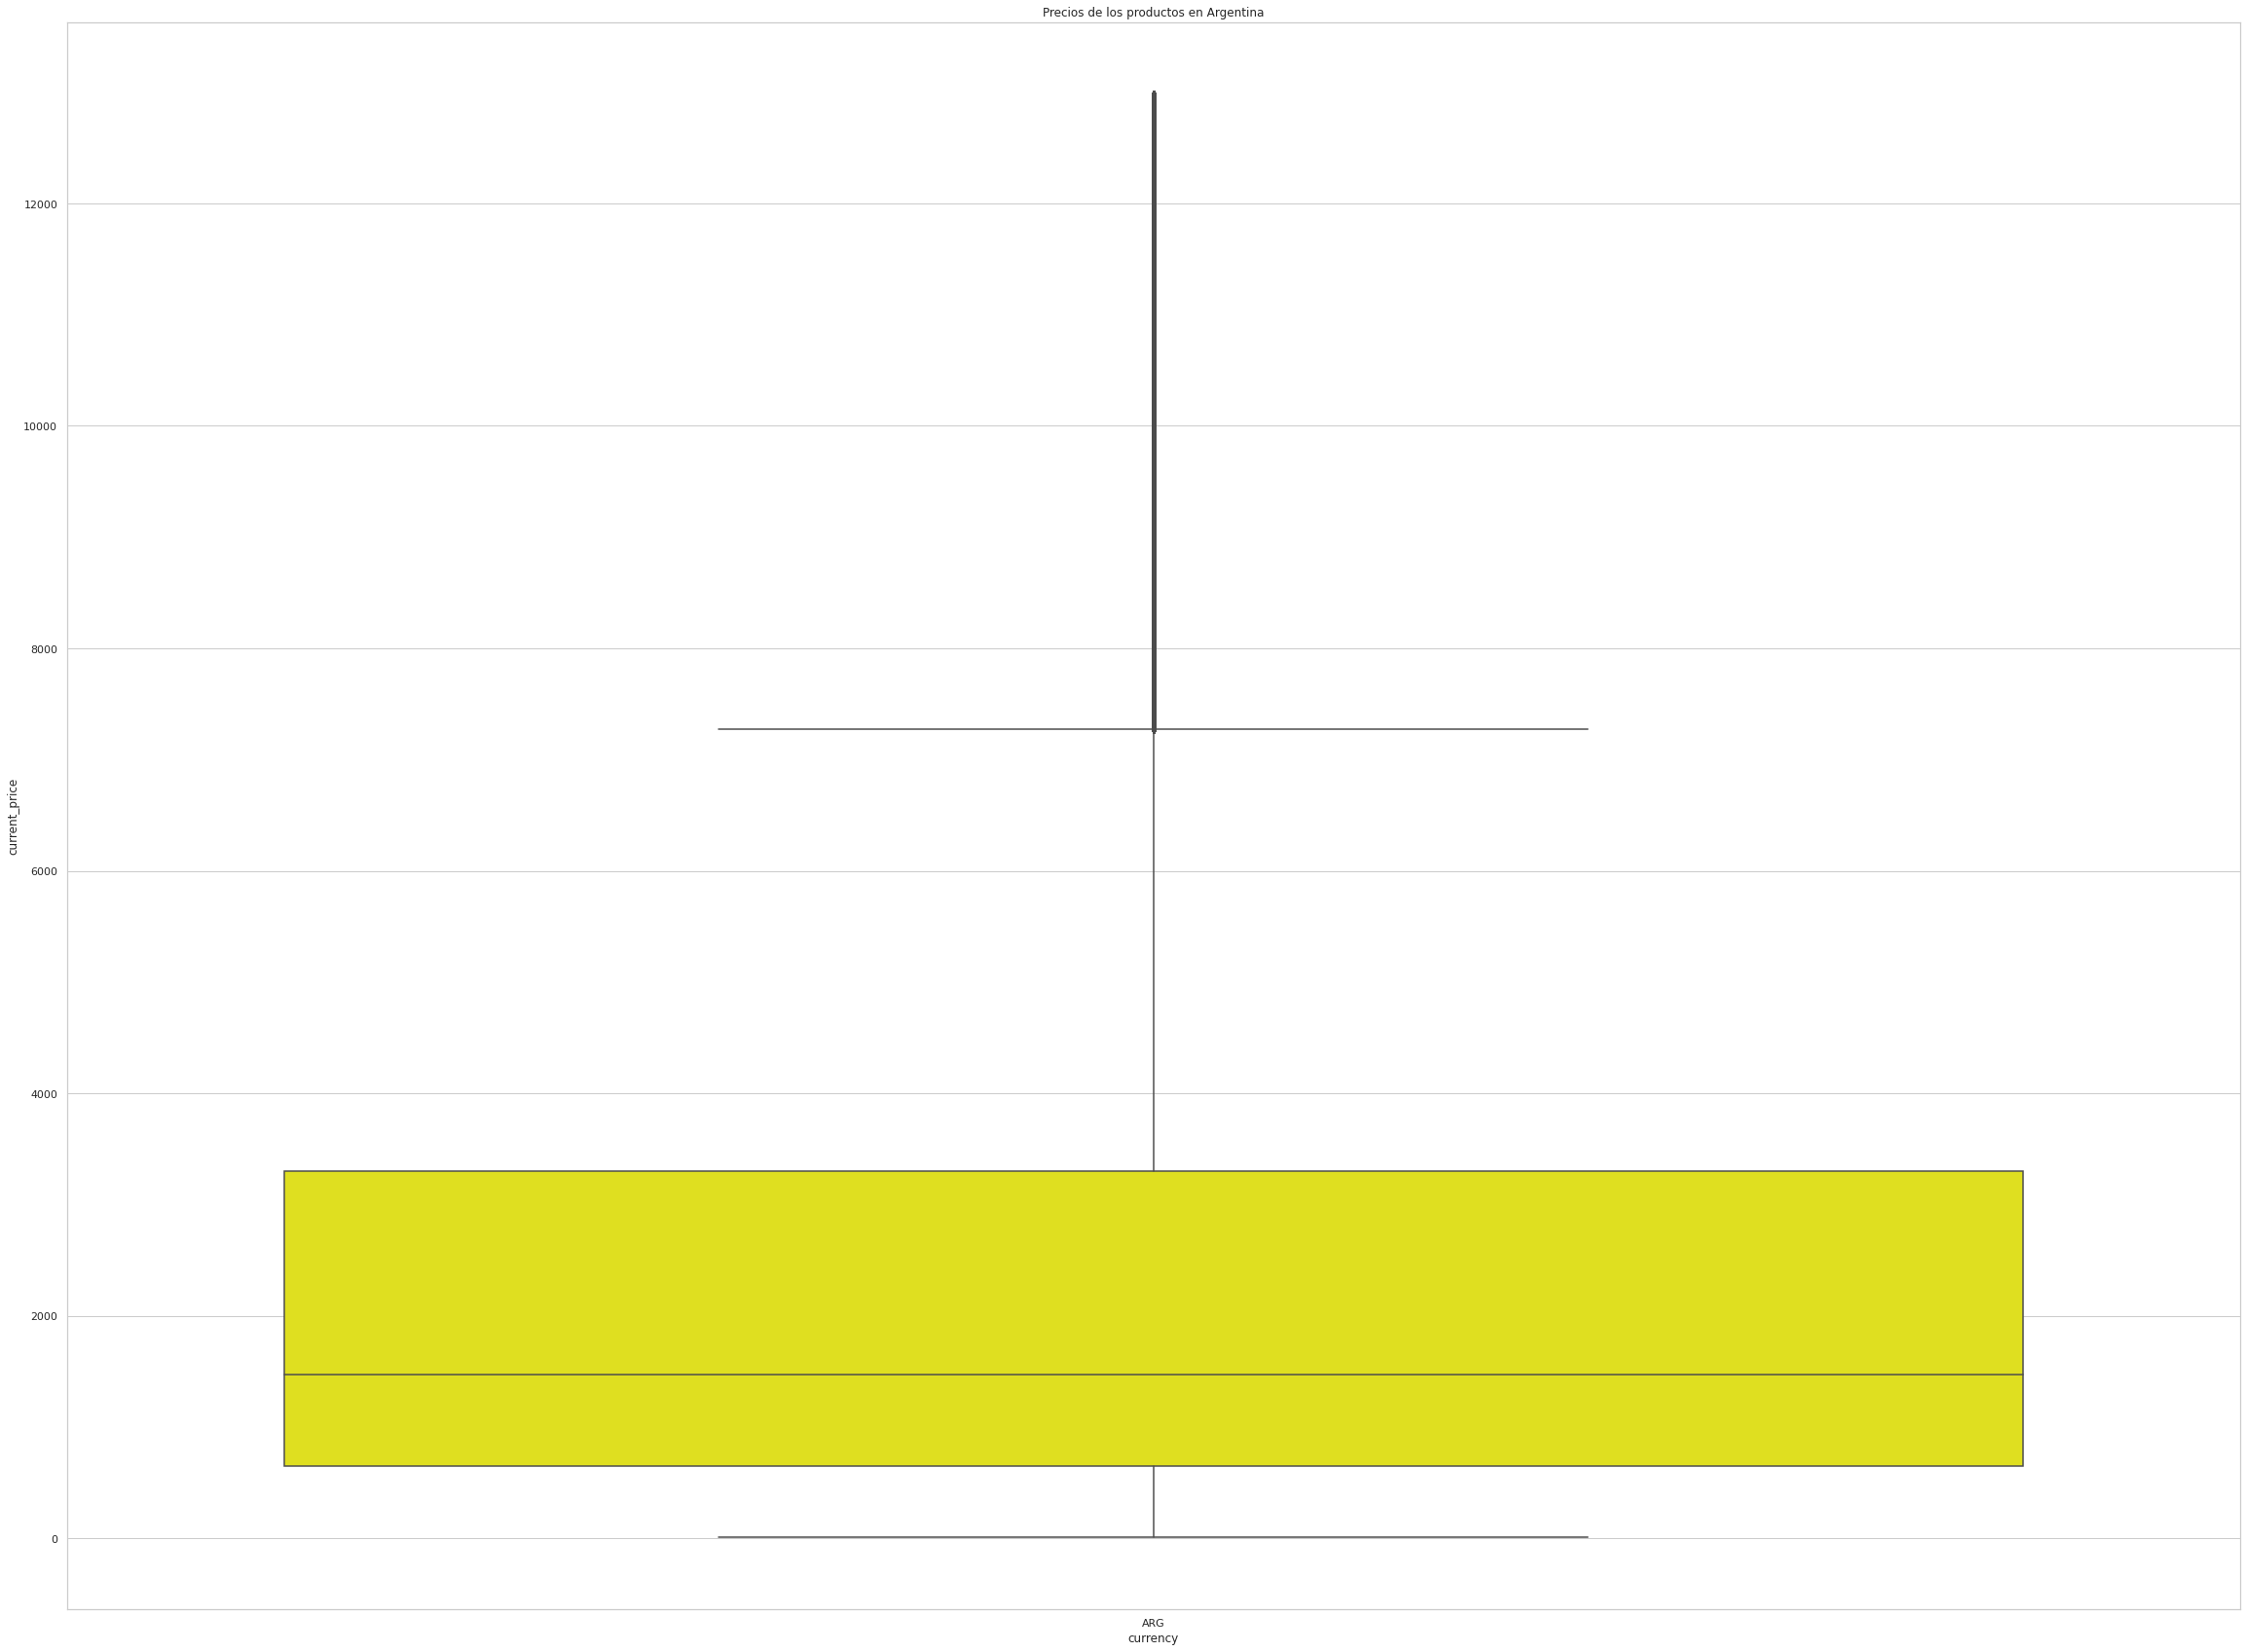

In [ ]:
sns.boxplot( x="currency", y="current_price", data= merge_arg, color='yellow')
plt.title("Precios de los productos en Argentina")

